# **TTI109 - Estatística**
# **Aula Complementar - Titanic**

Nessa aula vamos usar o conjunto de dados `titanic_train.csv` para treinar os conceitos de estatística descritiva. O arquivo de dados está disponível na pasta "Aula Complementar - Titanic" na seção "Aulas" da página de TTI109 no OPEN LMS.

## Importação das bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importação dos dados no formato Pandas DataFrame

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
titanic = pd.read_csv('titanic_train.csv')

## Análise exploratória

* Qual a dimensão dos conjunto de dados?
* Quais as colunas estão disponíveis para análise? Quais são os tipos de dados?
* Quais colunas são numéricas? Quais são categóricas ou cadastrais?
* Existem dados faltantes? Quantos? Em quais colunas? Em caso afirmativo, como proceder?

In [5]:
# Dimensão dos dados
dim = titanic.shape
print(f'Dimensão do conjunto de dados = {dim}')

Dimensão do conjunto de dados = (891, 12)


In [6]:
# Colunas disponíveis
col = titanic.columns
print(f'Colunas disponíveis: \n{col}')

Colunas disponíveis: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
# Tipos de dados
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [14]:
# Colunas numéricas
titanic.select_dtypes(include='number').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [15]:
# Colunas categóricas ou cadastrais
titanic.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [16]:
# Dados faltantes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# Existem valores faltantes nas colunas 'Age', 'Cabin' e 'Embarked'
# Quantos valores faltantes?
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

A coluna `'Age'` é de nosso interesse na análise e descrição dos dados. É preciso preencher os dados faltantes com alguma informação relevante à distribuição das idades.

Aqui, vamos adotar a seguinte estratégia:

* Agrupar os passageiros por classe (`'Pclass'`), sobrevivência ao naufrágio (`'Survived'`) e por gênero (`'Sex'`);
* Calcular a média das idades de cada agrupamento;
* Substituir os valores faltantes pela média do agrupamento a que pertence o indivíduo cuja idade não está registrada.

In [18]:
# Mantendo a coluna 'Age' (com valores faltantes) e criando uma cópia 'Age_Fill',
# cujas entradas faltantes serão preenchidas pelas médias dos agrupamentos
titanic['Age_Fill'] = titanic['Age']

# Criando os agrupamentos e calculando as médias
grupos = titanic['Age_Fill'].groupby([titanic['Pclass'], titanic['Survived'], titanic['Sex']], group_keys= False)

print(grupos.mean())

Pclass  Survived  Sex   
1       0         female    25.666667
                  male      44.581967
        1         female    34.939024
                  male      36.248000
2       0         female    36.000000
                  male      33.369048
        1         female    28.080882
                  male      16.022000
3       0         female    23.818182
                  male      27.255814
        1         female    19.329787
                  male      22.274211
Name: Age_Fill, dtype: float64


In [19]:
# Preenchendo os valores faltantes da coluna 'Age_Fill'
titanic['Age_Fill'] = grupos.apply(lambda x: x.fillna(x.mean()))

# O passageiro registrado na linha 176 é um homem que embarcou na 3a classe
# e não sobreviveu. Sua idade não está registrada ('Age' = NaN)
# Note que a idade presente na coluna 'Age_Fill' condiz com o agrupamento ao
# qual pertence o referido passageiro
display(titanic.iloc[176])

PassengerId                              177
Survived                                   0
Pclass                                     3
Name           Lefebre, Master. Henry Forbes
Sex                                     male
Age                                      NaN
SibSp                                      3
Parch                                      1
Ticket                                  4133
Fare                                 25.4667
Cabin                                    NaN
Embarked                                   S
Age_Fill                           27.255814
Name: 176, dtype: object

## Descrição dos dados

Construa gráficos / diagramas que descrevam de forma adequada:

**a)** A distribuição do gênero dos passageiros.

Sex
male      577
female    314
Name: count, dtype: int64


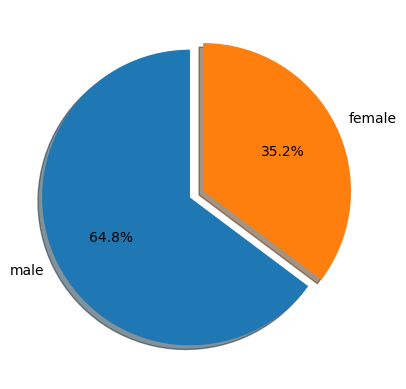

In [20]:
# Distribuição de gênero dos passageiros
dist_genero = titanic['Sex'].value_counts()
print(dist_genero)
plt.pie(x=dist_genero.values, labels=dist_genero.index, autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.05]*len(dist_genero))
plt.show()

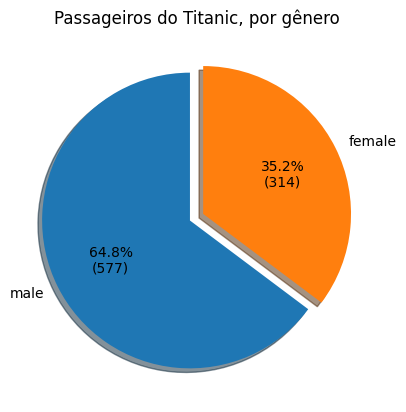

In [21]:
# Alternativa - Usando um prórpio código para formatação dos dados
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return f'{pct:.1f}%\n({val:d})'
  return my_format

plt.pie(dist_genero.values, labels=dist_genero.index,
        autopct=autopct_format(dist_genero.values),
        shadow=True, startangle=90,
        explode=[0.05]*len(dist_genero.values))
plt.title('Passageiros do Titanic, por gênero')
plt.show()

**b)** A distribuição dos sobreviventes.

Survived
0    549
1    342
Name: count, dtype: int64


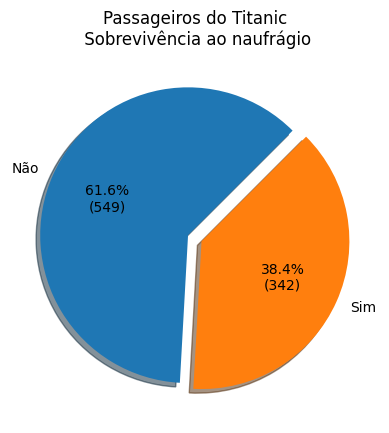

In [22]:
# Distribuição de sobreviventes
dist_sob = titanic['Survived'].value_counts()
print(dist_sob)
plt.pie(x=dist_sob.values, labels=['Não', 'Sim'], autopct=autopct_format(dist_sob.values), shadow=True, startangle=45, explode=[0.05]*len(dist_genero))
plt.title('Passageiros do Titanic\n Sobrevivência ao naufrágio')
plt.show()

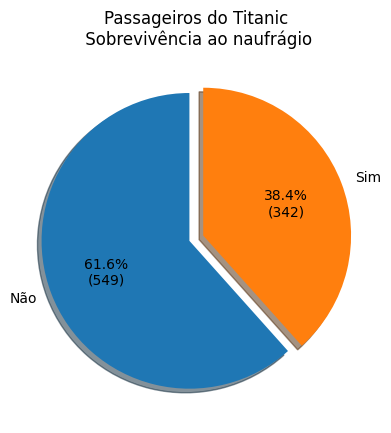

In [23]:
# Alternativa - Usando um prórpio código para formatação dos dados
plt.pie(dist_sob.values, labels=['Não', 'Sim'],
        autopct=autopct_format(dist_sob.values),
        shadow=True, startangle=90,
        explode=[0.05]*len(dist_sob.values))
plt.title('Passageiros do Titanic\n Sobrevivência ao naufrágio')
plt.show()

**c)** O número de sobreviventes em função:

* do gênero dos passageiros;
* da classe dos passageiros;
* do local de embarque dos passageiros.

Sex
female    233
male      109
Name: Survived, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64


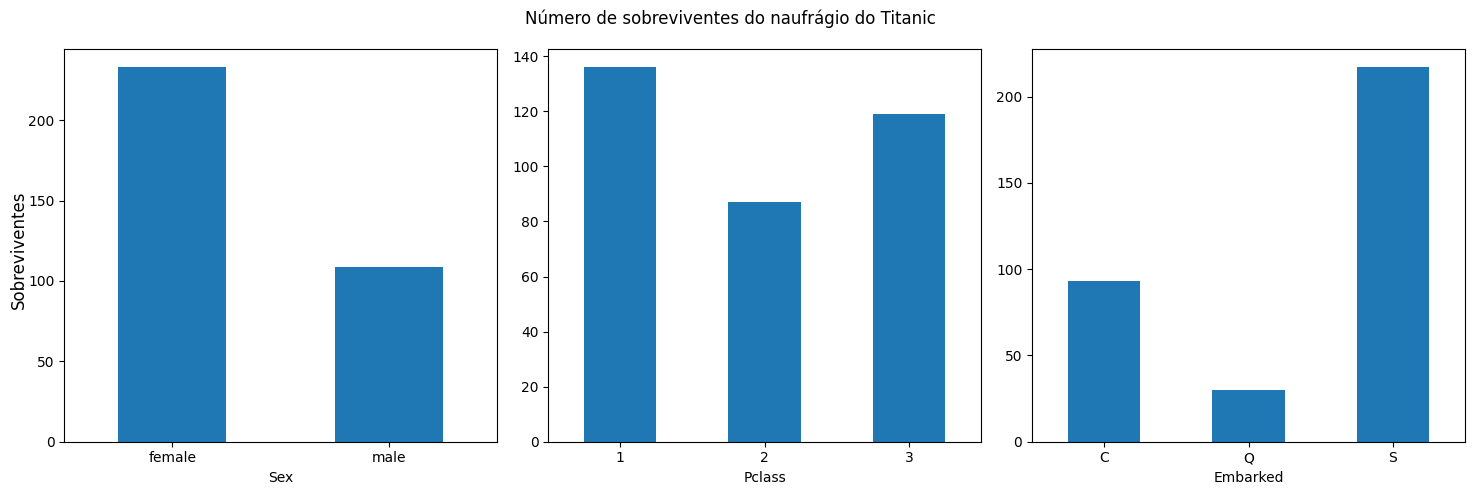

In [24]:
# Criação dos subplots para os gráficos de barra
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle('Número de sobreviventes do naufrágio do Titanic', fontsize=12)
fig.supylabel('Sobreviventes')

# Distribuição de sobreviventes em função:
# - do gênero dos passageiros
agg1 = titanic.groupby('Sex').agg('Survived').sum()
print(agg1)
agg1.plot(kind='bar', x='Sex', y='Survived', rot=0, ax=axis1)

# - da classe dos passageiros
agg2 = titanic.groupby('Pclass').agg('Survived').sum()
print(agg2)
agg2.plot(kind='bar', x='Pclass', y='Survived', rot=0, ax=axis2)

# - do local de embarque dos passageiros
agg3 = titanic.groupby('Embarked').agg('Survived').sum()
print(agg3)
agg3.plot(kind='bar', x='Embarked', y='Survived', rot=0, ax=axis3)

plt.tight_layout()
plt.show()

**d)** O número de sobreviventes em cada classe, por gênero.

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64


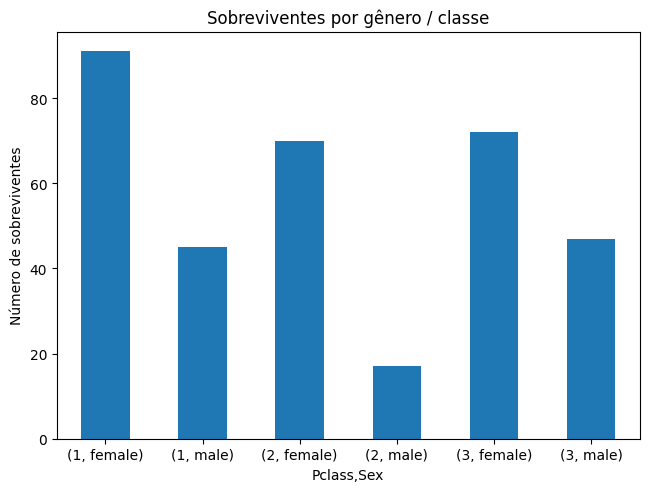

In [25]:
agg4 = titanic.groupby(['Pclass', 'Sex']).agg('Survived').sum()
print(agg4)
agg4.plot(kind='bar', y='Survived', rot=0)

plt.tight_layout()
plt.title('Sobreviventes por gênero / classe')
plt.ylabel('Número de sobreviventes')
plt.show()

**e)** A distribuição de idade dos passageiros, em classes com amplitude de 5 anos.

Distribuição de idades dos passageiros:
Age_Fill
(-0.001, 5.0]     44
(5.0, 10.0]       20
(10.0, 15.0]      19
(15.0, 20.0]     123
(20.0, 25.0]     148
(25.0, 30.0]     195
(30.0, 35.0]     104
(35.0, 40.0]      72
(40.0, 45.0]      63
(45.0, 50.0]      39
(50.0, 55.0]      24
(55.0, 60.0]      18
(60.0, 65.0]      14
(65.0, 70.0]       3
(70.0, 75.0]       4
(75.0, 80.0]       1
Name: count, dtype: int64


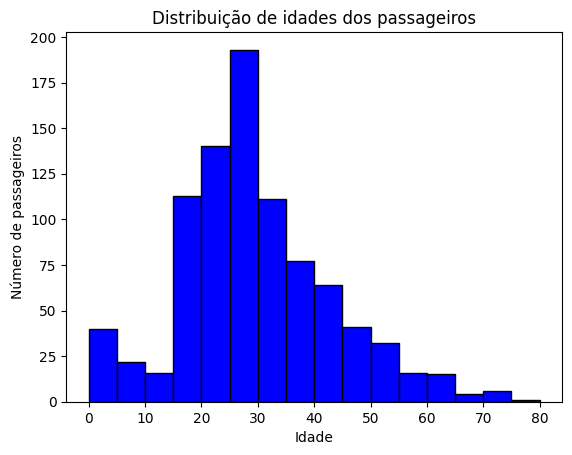

In [26]:
dist_idade = titanic['Age_Fill'].value_counts(bins=(list(range(0, 85, 5)))).sort_index()
print(f'Distribuição de idades dos passageiros:\n{dist_idade}')
titanic['Age_Fill'].hist(bins=list(range(0, 85, 5)), grid=False, color='blue', edgecolor='black')

plt.title('Distribuição de idades dos passageiros')
plt.xlabel('Idade')
plt.ylabel('Número de passageiros')
plt.show()

**f)** A distribuição de idades dos passageiros que não sobreviveram ao naufrágio.

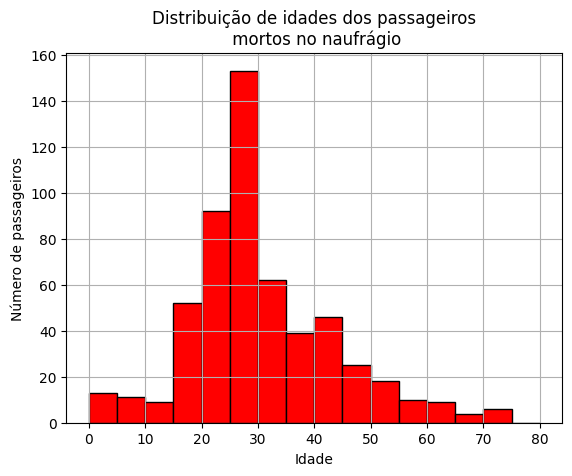

In [27]:
titanic[titanic['Survived'] == 0]['Age_Fill'].hist(bins=list(range(0, 85, 5)), grid= True, color='red', edgecolor='black')

plt.title('Distribuição de idades dos passageiros\n mortos no naufrágio')
plt.xlabel('Idade')
plt.ylabel('Número de passageiros')
plt.show()

**g)** A distribuição de idades dos passageiros que sobreviveram ao naufrágio.

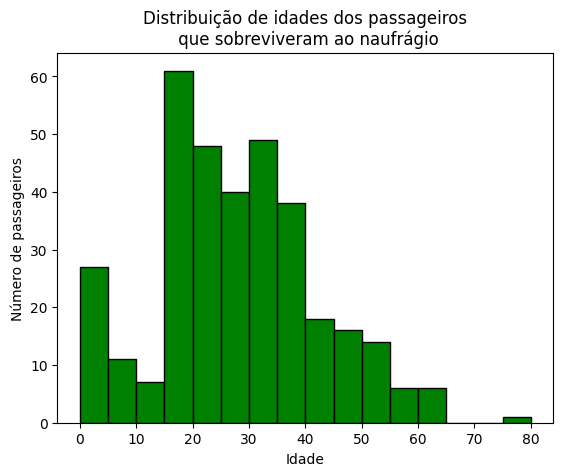

In [28]:
titanic[titanic['Survived'] == 1]['Age_Fill'].hist(bins=list(range(0, 85, 5)), grid=False, color='green', edgecolor='black')

plt.title('Distribuição de idades dos passageiros\n que sobreviveram ao naufrágio')
plt.xlabel('Idade')
plt.ylabel('Número de passageiros')
plt.show()

**h)** A distribuição de idades dos passageiros, identificando possíveis *oultiers*.

In [29]:
# Descrição geral do conjunto de dados
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Fill
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.339313
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.370271
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,21.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,27.255814
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [30]:
# Quartis da distribuição de idades
quartis = titanic['Age_Fill'].quantile([0.25, 0.5, 0.75], interpolation='linear')
display(quartis)

0.25    21.000000
0.50    27.255814
0.75    36.000000
Name: Age_Fill, dtype: float64

In [31]:
# Calculando a amplitude interquartil
interquartil = quartis[0.75] - quartis[0.25]
print(f'Amplitude interquartil: {interquartil} anos')

Amplitude interquartil: 15.0 anos


In [32]:
# Limites para detecção de outliers
lim_min = quartis[0.25] - 1.5*interquartil
lim_max = quartis[0.75] + 1.5*interquartil
print('Limites de detecção para outliers:')
print(f'Inferior = {lim_min}')
print(f'Superior = {lim_max}')

Limites de detecção para outliers:
Inferior = -1.5
Superior = 58.5


In [33]:
# Procurando por outliers
out_inf = titanic['Age_Fill'].loc[titanic['Age_Fill'] <= lim_min]
print('Outlier inferior:')
display(out_inf.sort_values(axis=0))

out_sup = titanic['Age_Fill'].loc[titanic['Age_Fill'] >= lim_max]
print('\nOutlier superior:')
display(out_sup.sort_values(axis=0))

Outlier inferior:


Series([], Name: Age_Fill, dtype: float64)


Outlier superior:


94     59.0
232    59.0
587    60.0
694    60.0
684    60.0
366    60.0
170    61.0
625    61.0
326    61.0
555    62.0
252    62.0
570    62.0
829    62.0
483    63.0
275    63.0
438    64.0
545    64.0
456    65.0
54     65.0
280    65.0
33     66.0
672    70.0
745    70.0
116    70.5
96     71.0
493    71.0
851    74.0
630    80.0
Name: Age_Fill, dtype: float64

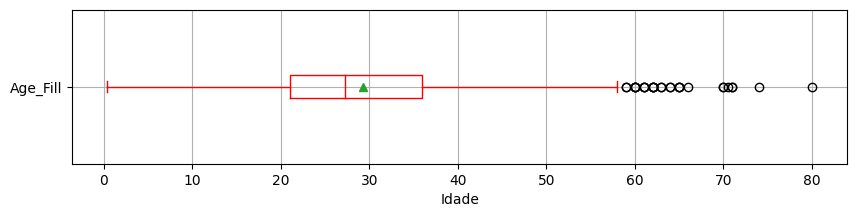

In [38]:
# Boxplot
pd.DataFrame(titanic['Age_Fill']).boxplot(color='red', vert=False, whis=1.5,
                                           showmeans=True, figsize=(10, 2))

plt.xlabel('Idade')
plt.show()


**i)** A distribuição de idades dos passageiros, por gênero, identificando possíveis *outliers*.

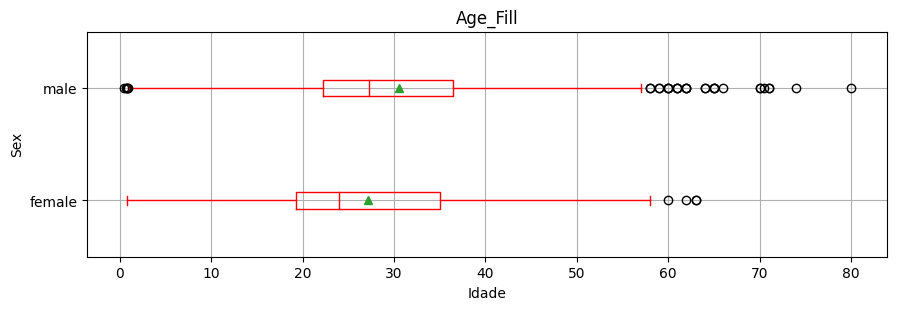

In [39]:
# Boxplot
titanic.boxplot(by='Sex', column=['Age_Fill'], color='red', showmeans=True,
                whis=1.5, vert=False, figsize=(10,3))

plt.suptitle('')
plt.xlabel('Idade')
plt.show()

**j)** A distribuição de idades dos passageiros que sobreviveram ou não ao naufrágio, identificando possíveis *outliers*.

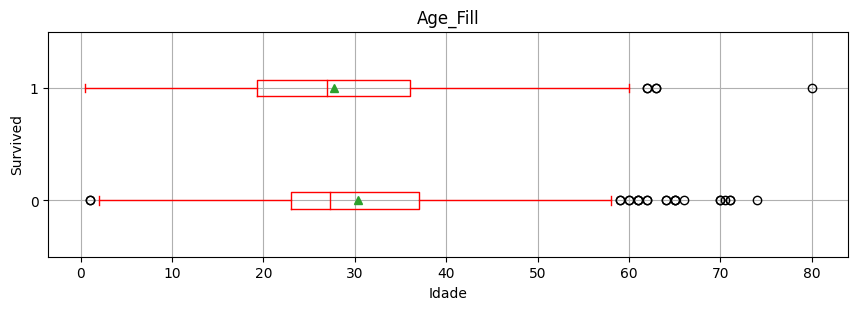

In [40]:
# Boxplot
titanic.boxplot(by='Survived', column=['Age_Fill'], color='red', showmeans=True,
                whis=1.5, vert=False, figsize=(10,3))

plt.suptitle('')
plt.xlabel('Idade')
plt.show()

## Probabilidades

**a)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com o gênero, a classe e a idade (abaixo dos 30 anos) dos passageiros. Essa tabela reùne a contagem de sobreviventes em cada agrupamento.

In [41]:
# Contagem de sobrevivência por 'Sex', 'Pclass' e 'Age_Fill' < 30
genero = titanic['Sex']
sobrevivencia = titanic['Survived']
classe = titanic['Pclass']
jovem = titanic['Age_Fill'] < 30

pd.crosstab([genero, classe, jovem], sobrevivencia)

Survived                  0   1
Sex    Pclass Age_Fill         
female 1      False       1  63
              True        2  28
       2      False       3  30
              True        3  40
       3      False      18   8
              True       54  64
male   1      False      65  32
              True       12  13
       2      False      54   5
              True       37  12
       3      False      78  10
              True      222  37

**b)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com a classe dos passageiros. A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* tenha sobrevivido, dado que pertencia à 2ª classe;
* pertença à 3ª classe, dado que não sobreviveu;
* pertença à 1ª classe e não tenha sobrevivido;
* tenha sobrevivido ou pertença à 3ª classe.


In [42]:
# Tabela de distribuição conjunta
tab = pd.crosstab(sobrevivencia, classe, margins=True)
display(tab)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [44]:
# P(Sobreviveu | 2ª classe)
prob = tab.iloc[1, 1] / tab.iloc[2, 1]
print(f'P(Sobreviveu | 2ª classe) = {prob*100:.1f}%')

P(Sobreviveu | 2ª classe) = 47.3%


In [43]:
# P(3ª classe | Não sobreviveu)
prob = tab.iloc[0, 2] / tab.iloc[0, 3]
print(f'P(3ª classe | Não sobreviveu) = {prob*100:.1f}%')

P(3ª classe | Não sobreviveu) = 67.8%


In [45]:
# P(1ª classe E Não sobreviveu) = P(1ª classe) * P(Não Sobreviveu | 1ª classe)
prob1 = tab.iloc[2, 0] / tab.iloc[2, 3]
prob2 = tab.iloc[0, 0] / tab.iloc[2, 0]
print(f'P(1ª classe E Não sobreviveu) = {prob1*prob2*100:.1f}%')

P(1ª classe E Não sobreviveu) = 9.0%


In [46]:
# P(Sobreviveu OU 3ª classe) = P(Sobreviveu) + P(3ª classe) - P(Sobreviveu E 3ª classe)
prob1 = tab.iloc[1, 3] / tab.iloc[2, 3]
prob2 = tab.iloc[2, 2] / tab.iloc[2, 3]
# P(Sobreviveu E 3ª classe) = P(Sobreviveu) * P(3ª classe | Sobreviveu)
prob3 = prob1 * tab.iloc[1, 2] / tab.iloc[1, 3]

print(f'P(Sobreviveu OU 3ª classe) = {(prob1+prob2-prob3)*100:.1f}%')

P(Sobreviveu OU 3ª classe) = 80.1%


**c)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com a idade inferior a 30 anos (jovem). A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* não tenha sobrevivido, dado que é jovem;
* não seja jovem, dado que sobreviveu;
* seja jovem e não tenha sobrevivido;
* tenha sobrevivido ou não seja jovem.


In [47]:
# Tabela de distribuição conjunta
tab = pd.crosstab(sobrevivencia, jovem, margins=True, normalize="index")
#tab = pd.crosstab(sobrevivencia, jovem, margins=True)
display(tab)

Age_Fill,False,True
Survived,,
0,0.398907,0.601093
1,0.432749,0.567251
All,0.411897,0.588103


**d)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com o gênero dos passageiros. A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* não tenha sobrevivido, dado que é mulher;
* seja homem, dado que sobreviveu;
* seja mulher e tenha sobrevivido;
* tenha sobrevivido ou seja mulher.


In [48]:
# Tabela de distribuição conjunta
tab = pd.crosstab(sobrevivencia, genero, margins=True)
#tab = pd.crosstab(sobrevivencia, genero, margins=True, normalize=True)
display(tab)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


**e)** Construa uma tabela de distribuição conjunta de frequências que relacione a sobrevivência ao naufrágio com a idade superior a 60 anos (idoso). A seguir, calcule as probabilidades de que um passageiro sorteado aleatoriamente:

* não tenha sobrevivido, dado que é idoso;
* não seja idoso, dado que sobreviveu;
* seja idoso e não tenha sobrevivido;
* tenha sobrevivido ou não seja idoso.


In [49]:
# Filtro de idade > 60 anos
idoso = titanic['Age_Fill'] > 60
# Tabela de distribuição conjunta
tab = pd.crosstab(sobrevivencia, idoso, margins=True)
#tab = pd.crosstab(sobrevivencia, idoso, margins=True, normalize=True)
display(tab)

Age_Fill,False,True,All
Survived,,,
0,532,17,549
1,337,5,342
All,869,22,891
